In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use('ggplot')
np.random.seed(123)

Beta分布を描く

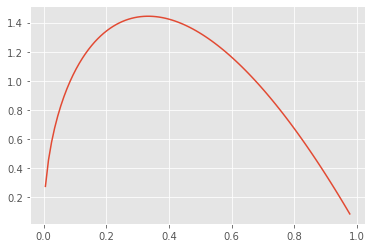

In [3]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

Beta分布に従う$\theta$のサンプラーを作る

In [36]:
theta = 0.8 # 初期位置
NMCS = 20000
epsilon = 0.5
theta_mcs = [theta]

for i in range(NMCS):
    # thetaをランダムウォークで遷移させる
    theta_new = theta + epsilon * np.random.randn()
    
    # 遷移元と遷移先のベータ分布における確率から棄却するかを判定
    if beta.pdf(theta_new, a, b) > beta.pdf(theta, a, b):
        # theta_newへの流れを強くするため受容
        theta = theta_new
    else:
        # theta_newへの流れが強すぎるので，強いほど低い確率で受容
        r = (beta.pdf(theta_new, a, b) / beta.pdf(theta, a, b) )
        if np.random.rand() < r:
            theta = theta_new

    # thetaの遷移を記録
    theta_mcs.append(theta)

df = pd.DataFrame(theta_mcs)
df.head()

,0
0,0.800000
1,0.800000
2,0.558798
3,0.558798
4,0.558798


Text(0, 0.5, '$\\Theta$')

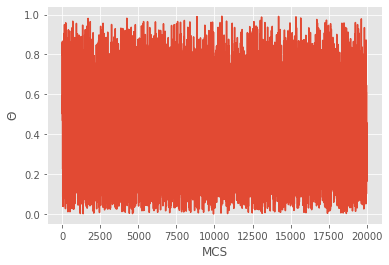

In [37]:
plt.plot(df[0])
plt.xlabel("MCS")
plt.ylabel("$\Theta$")

/Users/komatsu/programing/python/bayes_stat_intro/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


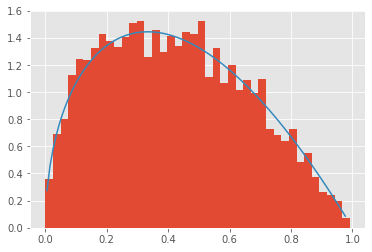

In [38]:
# バーンイン期間より後のステップで分布を調べる
plt.hist(df[0][1000:], normed=True, bins=40)

# Beta分布も一緒に描く
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))